In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, chi2_contingency, zscore, shapiro

In [2]:
df = pd.read_csv(r"/Users/muayadhilamia/Desktop/Ironhack/Week-5/lab/lab-eda-univariate/amz_uk_price_prediction_dataset.csv")

In [4]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


Part 1

In [8]:
# 1 
ct = pd.crosstab(df["category"], df["isBestSeller"])

ct["best_seller_ratio"] = ct[True] / (ct[True] + ct[False])

ct_sorted = ct.sort_values(by="best_seller_ratio", ascending=False)

ct_sorted.head(10)


isBestSeller,False,True,best_seller_ratio
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
"Billiard, Snooker & Pool",241,8,0.032129
Pet Supplies,9152,285,0.030200
Home Brewing & Wine Making,239,7,0.028455
Wind Instruments,243,7,0.028000


In [16]:
# 2 
chi2, p, dof, expected = chi2_contingency(ct.iloc[:, :2])
print(f"Chi2: {chi2:.3f}, p-value: {p:.4f}")

n = ct.iloc[:, :2].to_numpy().sum()
cramers_v = np.sqrt(chi2 / (n * (min(ct.shape[1]-1, ct.shape[0]-1))))
print(f"Cramér's V: {cramers_v:.3f}")

Chi2: 36540.203, p-value: 0.0000
Cramér's V: 0.086


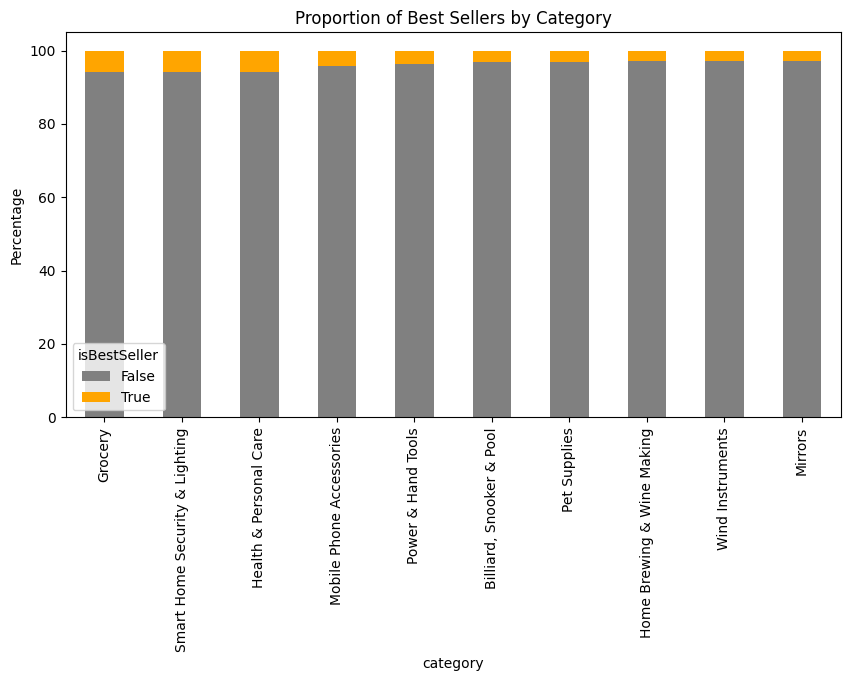

In [17]:
# 3 

ct_ratio = (pd.crosstab(df['category'], df['isBestSeller'], normalize='index') * 100)
ct_ratio.sort_values(True, ascending=False).head(10).plot(
    kind='bar', stacked=True, figsize=(10,5), color=['gray','orange']
)
plt.title('Proportion of Best Sellers by Category')
plt.ylabel('Percentage')
plt.show()


Part 2 

In [ ]:
# 0 
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1      

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR 

df_clean = df[(df["price"] >= lower_bound) & (df["price"] <= upper_bound)]
df_clean

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


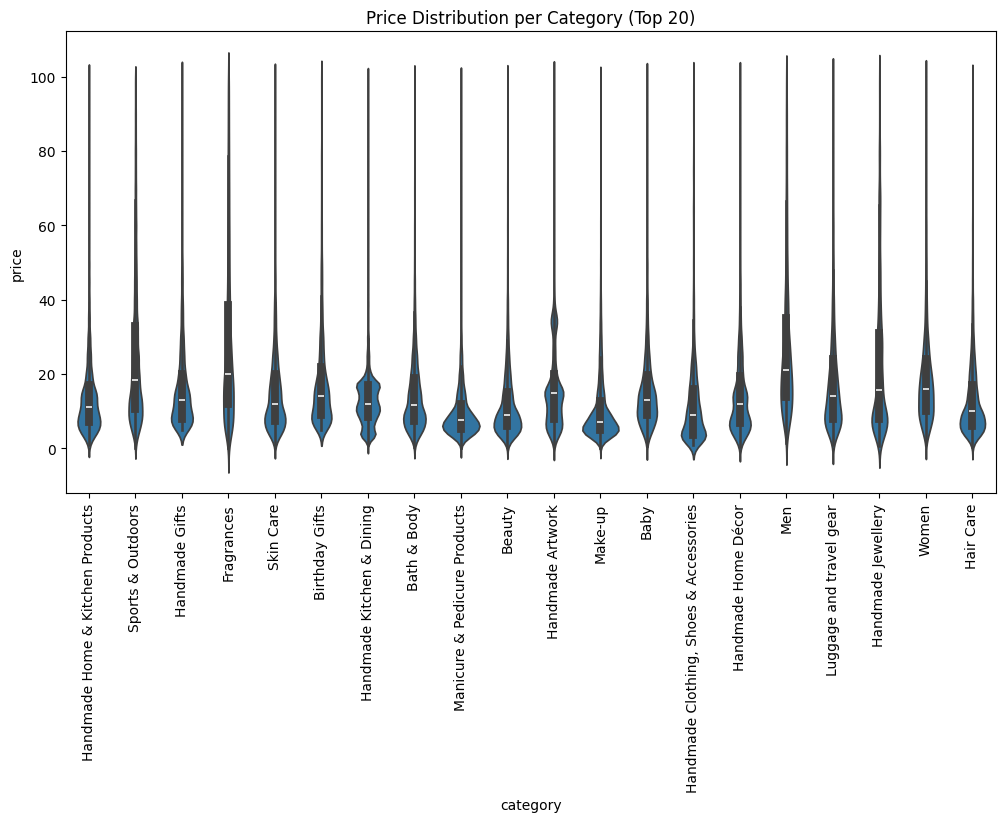

In [21]:
# 1 
top20 = df_clean['category'].value_counts().head(20).index
df_top = df_clean[df_clean['category'].isin(top20)]

plt.figure(figsize=(12,6))
sns.violinplot(x='category', y='price', data=df_top)
plt.xticks(rotation=90)
plt.title('Price Distribution per Category (Top 20)')
plt.show()


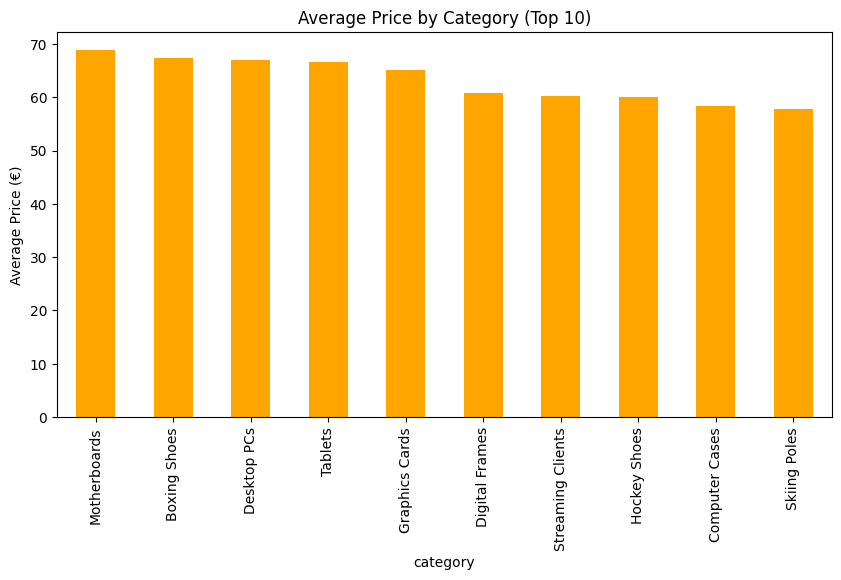

In [22]:
# 2 
avg_price = (
    df_clean.groupby('category')['price']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,5))
avg_price.head(10).plot(kind='bar', color='orange')
plt.title('Average Price by Category (Top 10)')
plt.ylabel('Average Price (€)')
plt.show()

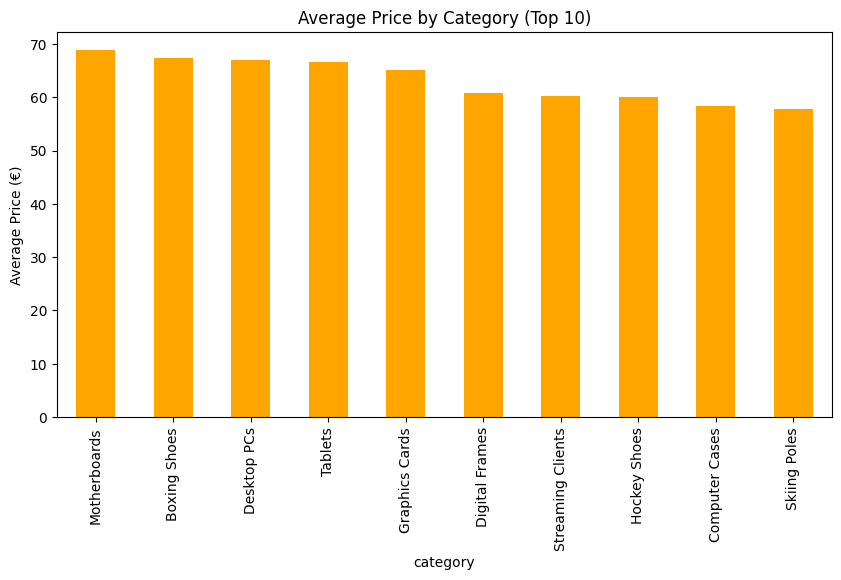

In [23]:
# 3
avg_price = (
    df_clean.groupby('category')['price']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,5))
avg_price.head(10).plot(kind='bar', color='orange')
plt.title('Average Price by Category (Top 10)')
plt.ylabel('Average Price (€)')
plt.show()

Part 3 


In [25]:
# 1 
corr = df_clean['price'].corr(df_clean['stars'], method='pearson')
print(f"Pearson correlation between price and stars: {corr:.3f}")


Pearson correlation between price and stars: -0.078


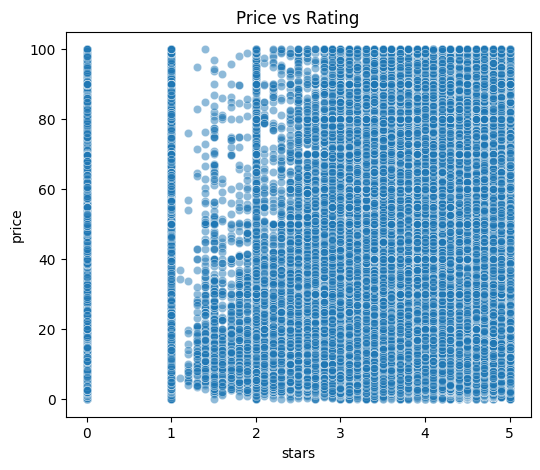

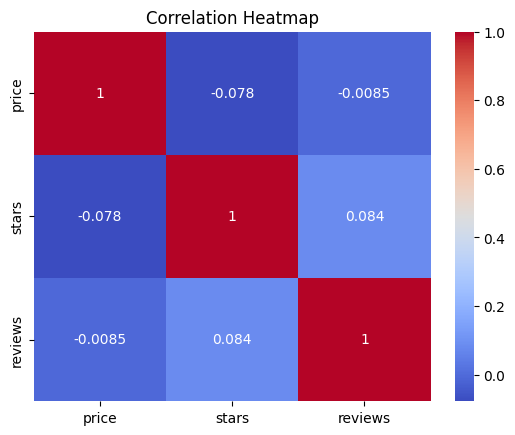

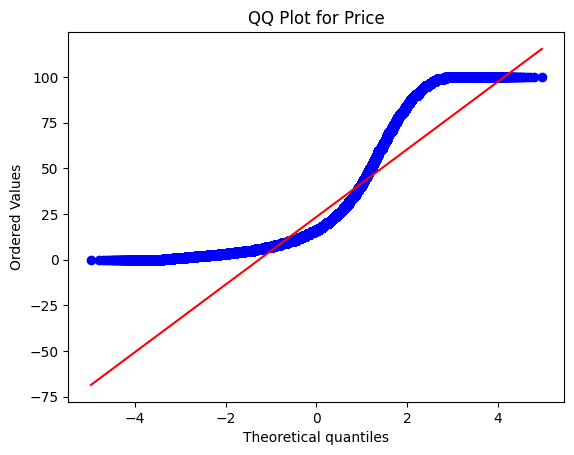

In [27]:
# 2
# Scatter plot
plt.figure(figsize=(6,5))
sns.scatterplot(x='stars', y='price', data=df_clean, alpha=0.5)
plt.title('Price vs Rating')
plt.show()

# Heatmap
sns.heatmap(df_clean[['price','stars','reviews']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


stats.probplot(df_clean['price'], dist='norm', plot=plt)
plt.title('QQ Plot for Price')
plt.show()